# Fashion MNIST

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as matimage
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

Using TensorFlow backend.


# upgrade pip
! pip install --upgrade pip

# Current stable release for CPU-only
! pip install tensorflow

# Preview nightly build for CPU-only (unstable)
! pip install tf-nightly

# Install TensorFlow 2.0 RC
! pip install tensorflow==2.0.0-rc1

! pip install keras

In [2]:
from keras.datasets import fashion_mnist



In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [4]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

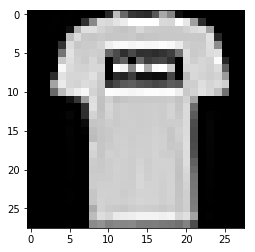

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.gray()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

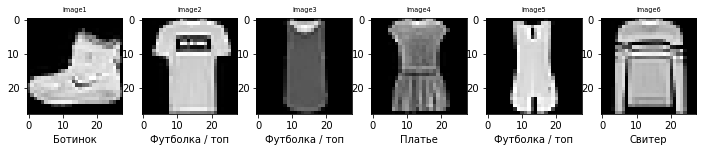

In [11]:
n_row = 1
n_col = 6
plt.figure(figsize=(12,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_images[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.5021 - accuracy: 0.8245
Epoch 2/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.3744 - accuracy: 0.8654
Epoch 3/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3378 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.3101 - accuracy: 0.8862
Epoch 5/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2933 - accuracy: 0.8927
Epoch 6/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2792 - accuracy: 0.8979 0s
Epoch 7/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2657 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2584 - accuracy: 0.9044
Epoch 9/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2476 - accuracy: 0.9077 0s - loss: 0.2470 - accura
Epoch 10/10
60000/60000 [

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nТочность на проверочных данных:', test_acc)

10000/10000 [==============================] - 1s 58us/step

Точность на проверочных данных: 0.8709999918937683


In [16]:
predictions = model.predict(test_images)



In [17]:
predictions[0]

array([2.2130109e-06, 4.3903010e-09, 2.3230294e-08, 2.4898117e-10,
       1.7817129e-08, 3.1300768e-04, 2.9697551e-06, 3.8085170e-03,
       1.1127903e-07, 9.9587315e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

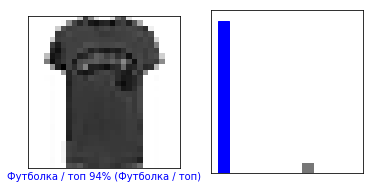

In [21]:
i = 19
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

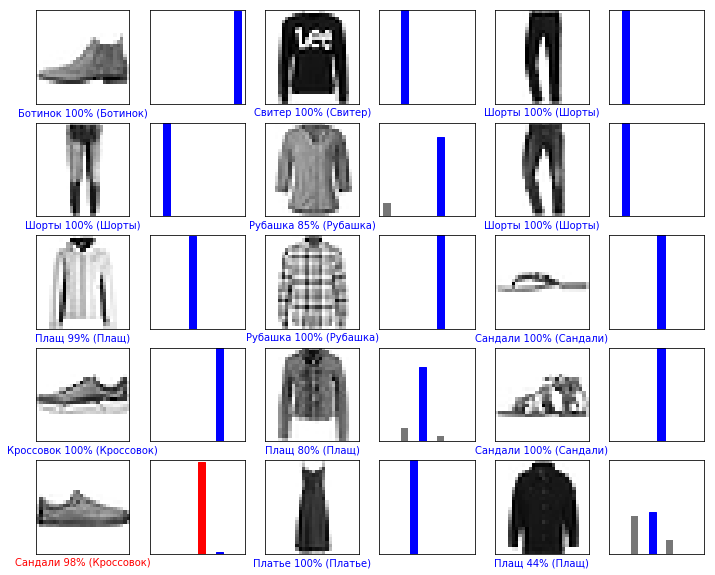

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [23]:
img = test_images[0]

print(img.shape)

(28, 28)


In [24]:
tf.keras.layers.Flatten(input_shape=[28, 28, 1])

In [25]:
tf.keras.layers.Dense(128, activation=tf.nn.relu)

In [26]:
tf.keras.layers.Dense(10, activation=tf.nn.softmax)

In [27]:
# Добавляем изображение в пакет данных, состоящий только из одного элемента.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.21301093e-06 4.39030945e-09 2.32302053e-08 2.48980697e-10
  1.78171611e-08 3.13007680e-04 2.96974690e-06 3.80851515e-03
  1.11278815e-07 9.95873153e-01]]


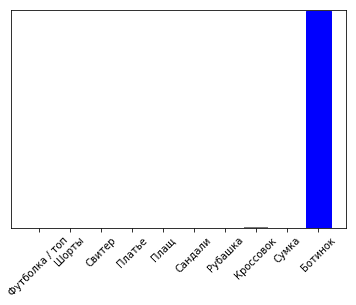

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

9